##Question 1: Explain the basic structure and working of a simple Artificial Neural Network (ANN).In your explanation, include the following point:

● The role of neurons and layers in an ANN.

● How information flows through the network.

● The significance of activation functions and provide examples of commonly used activation
functions.

● The concept of weights and biases and their role in training an ANN.
Instructions: This is a theoretical question. No dataset is required.

### Basic Structure and Working of a Simple Artificial Neural Network (ANN)

Artificial Neural Networks (ANNs) are computational models inspired by the human brain. They consist of interconnected units called neurons organized in layers. Here's a detailed explanation of the basic structure and working of an ANN:

##1. Role of Neurons and Layers in an ANN

- **Neurons**: Neurons are the fundamental units of an ANN. Each neuron receives inputs, processes them, and passes the output to the next layer. A neuron can be visualized as a node in the network.

![](https://drive.google.com/file/d/1jIaRKysBD1MEdK1DPsGVmNzmTeEekE4V/view?usp=drivesdk)

- **Layers**: An ANN consists of three types of layers:
        

  - **Input Layer**: This is the first layer where the network receives the input data. Each neuron in this layer represents a feature of the input.
  - **Hidden Layers**: These are intermediate layers between the input and output layers. They perform complex transformations on the inputs received. An ANN can have one or more hidden layers.
  - **Output Layer**: This is the final layer that produces the output of the network. The number of neurons in this layer corresponds to the number of output variables.

##2. How Information Flows Through the Network

- **Forward Propagation**: Information flows through the network from the input layer to the output layer.
  - **Input Layer**: Each input feature is fed into the corresponding neuron in the input layer.
  - **Hidden Layers**: Each neuron in a hidden layer receives inputs from all neurons in the previous layer. It processes these inputs using a weighted sum, adds a bias, and applies an activation function to produce an output.
  - **Output Layer**: The processed information from the last hidden layer is passed to the output layer, which produces the final prediction or classification.

![](https://images.app.goo.gl/zy2phxmxQXS6VViG7)


## 3. The Significance of Activation Functions

- **Purpose**: Activation functions introduce non-linearity into the network, enabling it to learn complex patterns in the data. Without activation functions, an ANN would behave like a linear model regardless of the number of layers.
- **Commonly Used Activation Functions**:
  - **Sigmoid**: \(\sigma(x) = \frac{1}{1 + e^{-x}}\)
    - Maps input values to a range between 0 and 1.
    - Useful for binary classification problems.
  - **ReLU (Rectified Linear Unit)**: \(f(x) = \max(0, x)\)
    - Introduces non-linearity by setting all negative values to zero.
    - Widely used in hidden layers due to its simplicity and efficiency.
  - **Tanh (Hyperbolic Tangent)**: \(\tanh(x) = \frac{2}{1 + e^{-2x}} - 1\)
    - Maps input values to a range between -1 and 1.
    - Useful for data centered around zero.
  - **Softmax**: \(\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}\)
    - Converts a vector of values to a probability distribution.
    - Commonly used in the output layer for multi-class classification problems.

##4. The Concept of Weights and Biases and Their Role in Training an ANN

- **Weights**: Weights determine the importance of each input to a neuron. Each connection between neurons has an associated weight. During training, the weights are adjusted to minimize the error in the network's predictions.
- **Biases**: Biases allow the activation function to be shifted to the left or right, which helps the model better fit the data. Each neuron (except those in the input layer) has an associated bias.
- **Role in Training**:
  - **Initialization**: Weights are typically initialized to small random values, and biases are often initialized to zero.
  - **Forward Propagation**: Inputs are multiplied by weights, summed, and then biases are added. The activation function is applied to this sum to produce the neuron's output.
  - **Backpropagation**: The difference between the predicted output and the actual target (error) is calculated. The error is propagated back through the network, and the weights and biases are adjusted using optimization algorithms like Gradient Descent to minimize the error.

##Conclusion

- **Neurons and Layers**: Neurons are the basic units organized into layers. The layers include input, hidden, and output layers.
- **Information Flow**: Information flows through the network from the input layer, through hidden layers, to the output layer via forward propagation.
- **Activation Functions**: Activation functions introduce non-linearity, enabling the network to learn complex patterns. Examples include Sigmoid, ReLU, Tanh, and Softmax.
- **Weights and Biases**: Weights determine the significance of inputs, and biases help in fitting the data better. They are adjusted during training to minimize prediction error.

##Question 2: Build a FCNN to recognize handwritten digits. Use MNIST handwritten digit data set.
 Your network should have:

● An input layer of size 784 (28x28 pixels)


● Two hidden layers with 128 neurons each and ReLU activation

● An output layer with 10 neurons (one for each digit) and softmax activation (Use accuracy as
an error measure).

##Load required packages and dataset

In [ ]:
###1. Load Data and Splot Data
#from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the  MNIST dataset
mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

##Data splitting

In [ ]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

##Display the dataset

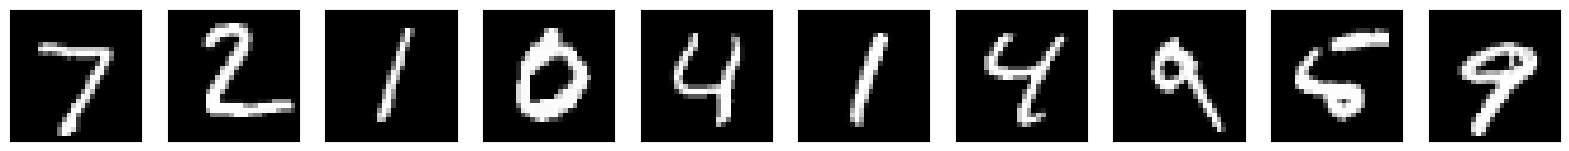

In [ ]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

##Preprocess the dataset

##Flatten the imagés

In [ ]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)


In [ ]:
#Flatten the images to 1D vectors of 784 features (28x28)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

##Min-Max scaling

In [ ]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

##Processing the target variables

In [ ]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


##Hyper-parameter

In [ ]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 128

# Define the number of neurons in the second hidden layer
hidden2 = 128

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 10

##Building the Model

In [ ]:
# Create a Sequential model
model = Sequential()

# Add the first hidden layer with 128 neurons and ReLU activation
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

# Add the second hidden layer with 128 neurons and ReLU activation
model.add(Dense(hidden2, activation='relu'))

# Add the output layer with 10 neurons and softmax activation
model.add(Dense(classes, activation='softmax'))

In [ ]:

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training the model

In [ ]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 1.6785 - accuracy: 0.5714
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.7205 - accuracy: 0.8270
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4920 - accuracy: 0.8722
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8903
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3664 - accuracy: 0.8984
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3392 - accuracy: 0.9056
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3199 - accuracy: 0.9101
Epoch 8/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3047 - accuracy: 0.9146
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2920 - accuracy: 0.9174
Epoch 10/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2813 - accuracy: 0.9207

##Testing the model

In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.9049


In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 33ms/step


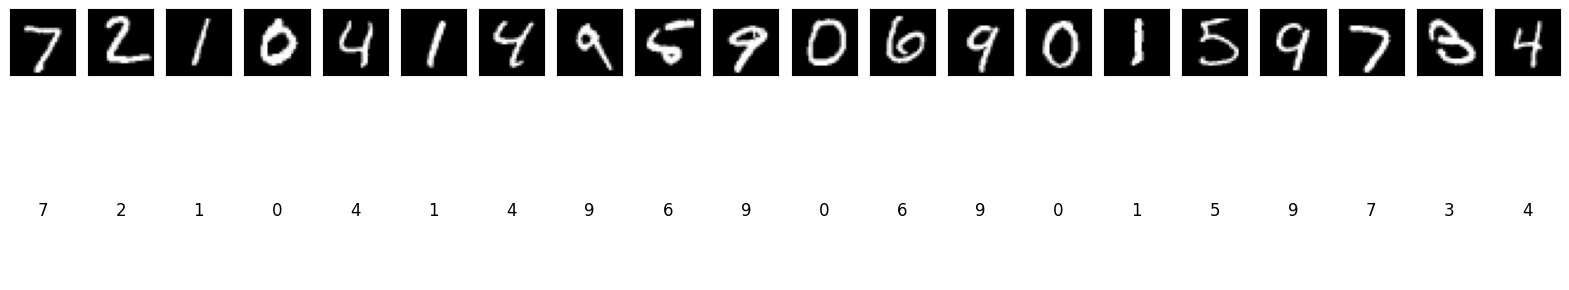

In [ ]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()

##Question 3: Explain the importance of hyperparameter tuning in training an ANN. List at least three hyperparameters commonly tuned in ANN training and describe their impact on the model's performance.

## Importance of Hyperparameter Tuning in Training an ANN

- **Optimization of Model Performance**: Hyperparameter tuning helps find the best set of hyperparameters that lead to optimal model performance, thereby improving accuracy and generalization to unseen data.
- **Prevention of Overfitting/Underfitting**: Proper tuning can balance the model complexity, preventing overfitting (too complex) or underfitting (too simple).
- **Efficiency**: Fine-tuning hyperparameters can reduce training time and computational resources by avoiding unnecessary training cycles on suboptimal configurations.
- **Stability and Convergence**: Appropriate hyperparameters ensure that the training process converges to a stable solution efficiently.

![](https://images.app.goo.gl/TmuHw8vvkgG3BF4H6)


##Commonly Tuned Hyperparameters and Their Impact

1. **Learning Rate**
   - **Description**: The learning rate controls the step size at each iteration while moving towards a minimum of the loss function.
   - **Impact**:
     - **Too High**: May cause the model to converge too quickly to a suboptimal solution or diverge.
     - **Too Low**: May lead to a very slow convergence, requiring more epochs to train, potentially getting stuck in local minima.

2. **Number of Hidden Layers and Neurons**
   - **Description**: Refers to the architecture of the neural network, including the number of hidden layers and the number of neurons per layer.
   - **Impact**:
     - **Too Few Layers/Neurons**: May lead to underfitting as the model might not capture the complexity of the data.
     - **Too Many Layers/Neurons**: May result in overfitting as the model becomes too complex, capturing noise in the training data.
     - **Balanced Configuration**: Adequate number of layers and neurons allow the model to generalize well, capturing underlying patterns without overfitting.

3. **Batch Size**
   - **Description**: The number of training samples used in one iteration to update the model's weights.
   - **Impact**:
     - **Small Batch Size**: Provides a noisy estimate of the gradient, which can help escape local minima but may lead to slower training.
     - **Large Batch Size**: Provides a more accurate estimate of the gradient, potentially leading to faster convergence but can get stuck in local minima and require more memory.
     - **Optimal Batch Size**: Balances noise and computation efficiency, leading to stable and efficient training.

4. **Number of Epochs**
   - **Description**: The number of times the entire training dataset is passed through the network.
   - **Impact**:
     - **Too Few Epochs**: May result in underfitting as the model hasn't seen the data enough times to learn patterns.
     - **Too Many Epochs**: May lead to overfitting where the model starts to memorize the training data rather than generalizing well.
     - **Proper Epochs**: Ensures the model has sufficiently learned from the data without overfitting, often monitored using early stopping techniques.

5. **Dropout Rate**
   - **Description**: The percentage of neurons randomly turned off during training to prevent overfitting.
   - **Impact**:
     - **No Dropout**: May lead to overfitting as the model may become overly reliant on specific neurons.
     - **High Dropout Rate**: May lead to underfitting as too many neurons are dropped, reducing the model's capacity to learn.
     - **Optimal Dropout Rate**: Provides regularization, preventing overfitting while retaining model's learning capacity.

![](https://www.google.com/imgres?imgurl=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A2000%2F1*XV7-i1NwZ27_QYbcPkW8hQ.png&tbnid=eyvDrYnnWztrWM&vet=1&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Fhyperparameters-in-deep-learning-927f7b2084dd&docid=X485L40JbvmEUM&w=1490&h=811&itg=1&hl=en-PK&source=sh%2Fx%2Fim%2Fm1%2F4&kgs=581ea8a333789b8f&shem=abme%2Ctrie)


##Conclusion

Hyperparameter tuning is crucial for optimizing an ANN's performance, ensuring efficient and stable training, and balancing overfitting and underfitting. Commonly tuned hyperparameters include:

- **Learning Rate**: Controls the step size in the optimization process.
- **Number of Hidden Layers and Neurons**: Defines the model's capacity to learn patterns.
- **Batch Size**: Affects the gradient estimate and training efficiency.
- **Number of Epochs**: Determines how long the model is trained.
- **Dropout Rate**: Provides regularization to prevent overfitting.

##Question 4: Write a Python script to create and compare the performance of an ANN using different activation functions (ReLU, Sigmoid, and Tanh) for the hidden layers. Use a simple dataset (e.g., Iris dataset) to train and evaluate the models. Report the accuracy for each
activation function.

#load the Dataset

In [ ]:
###1. Load Data and Splot Data
#from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn import datasets  # Import datasets from sklearn

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Iris dataset from sklearn
iris = datasets.load_iris()

# Access the data and target attributes of the Iris dataset
X = iris.data
y = iris.target

# Now you can use X and y for training and testing your model
# For example, you can split them into training and testing sets:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# Continue with the rest of your code...

##Preprocessing the dataset

In [ ]:
# 2. Preprocess the data
# Encode the target labels to one-hot encoded vectors
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

##Splitting the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Display the dataset

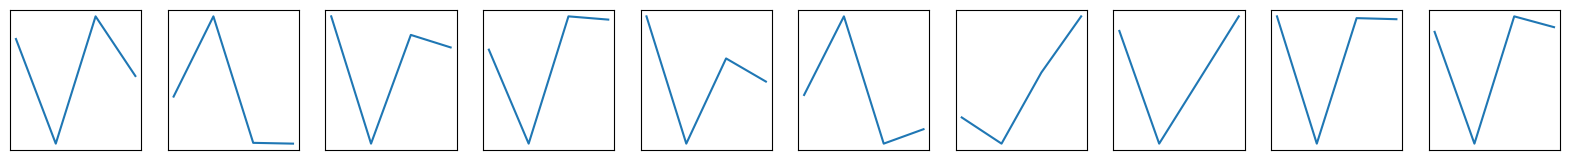

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Assuming X_test is a 2D array where each row represents features, NOT a flattened image
plt.figure(figsize=(20, 4))
for i in range(min(n, X_test.shape[0])):  # Handle cases where X_test might have fewer than n rows
    ax = plt.subplot(2, n, i + 1)

    # If X_test does not contain image data, you might want to visualize it differently
    # Here's an example of plotting each row as a line
    plt.plot(X_test[i])

    # Or you could display it as a bar chart
    # plt.bar(range(X_test.shape[1]), X_test[i])

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

##Standardize the feature

In [ ]:
# Standardize the features (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Building The model

In [ ]:
# 3. Define a function to build the ANN model with a specified activation function and number of output classes
def build_ann_model(activation_function, num_classes): # Add num_classes parameter
    model = Sequential([
        Dense(400, activation=activation_function, input_shape=(X_train.shape[1],)),
        Dense(20, activation=activation_function),
        Dense(num_classes, activation='softmax') # Use num_classes here
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Removed assignment here
    return model

# Create the model (example usage)
model = build_ann_model('relu', 10)  # Assuming 10 output classes

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2000      
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 10230 (39.96 KB)
Trainable params: 10230 (39.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 4. Train and evaluate the model for each activation function
activation_functions = ['relu', 'sigmoid', 'tanh']
results = {}
num_classes = y_train.shape[1] # Determine the number of classes from y_train
for activation_function in activation_functions:
    print(f'Training with activation function: {activation_function}')
    model = build_ann_model(activation_function, num_classes) # Pass num_classes to the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)  # Train with verbosity off for cleaner output
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation_function] = accuracy
    print(f'Accuracy with {activation_function}: {accuracy:.4f}')

Training with activation function: relu
Accuracy with relu: 1.0000
Training with activation function: sigmoid
Accuracy with sigmoid: 0.9667
Training with activation function: tanh
Accuracy with tanh: 1.0000


In [ ]:
# 5. Report the accuracy for each activation function
print("\nAccuracy for each activation function:")
for activation_function, accuracy in results.items():
    print(f"{activation_function}: {accuracy}")


Accuracy for each activation function:
relu: 1.0
sigmoid: 0.9666666388511658
tanh: 1.0


Question 5: Weather Prediction Using Fully Connected Neural Networks.

● Write code to load historical weather data from a CSV file.

● Preprocess the data by handling missing values, converting categorical variables to numerical,and normalizing numerical features.

● Write code to create a neural network model using TensorFlow or Keras, with appropriate input, hidden, and output layers.

● Write code to train the neural network model using the training data, and include validation to monitor performance.

● Write code to evaluate the model on the test dataset and print the mean squared error.

● Experiment with different configurations of the model and hyperparameters to improve performance. Document the impact of changes.

● Write code to predict weather conditions using new or unseen data and interpret the results.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

##Load the Dataset

In [ ]:
# Load historical weather data from a CSV file
data = pd.read_csv('/content/Weather Training Data.csv.zip')

In [ ]:
data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [ ]:
data.shape

(99516, 23)

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [ ]:
data.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

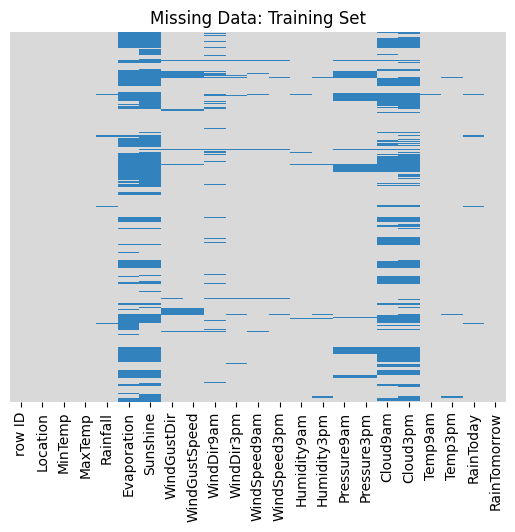

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
# Step 2: Preprocess the data
# Handle missing values by filling them with the mean of the column
# Select only numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [ ]:
# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

##Normalization

In [ ]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

##Split the data into features

In [ ]:
# Split the data into features and target
# Assuming the last column is the target variable (e.g., temperature)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

##Splitting the dataset

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

##Display the dataset

(22,)
Skipping image 0 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 1 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 2 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 3 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 4 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 5 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 6 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 7 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 8 due to reshape error: cannot reshape array of size 22 into shape (28,28)
(22,)
Skipping image 9 due to reshape error: cannot reshape array of size 22 into shape (28,28)


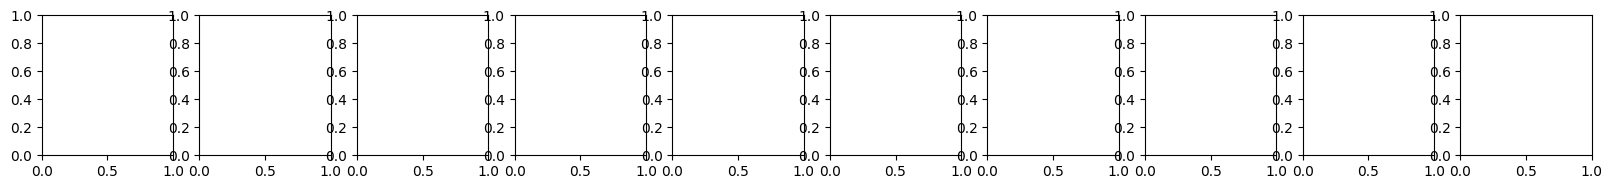

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Check the shape of the data before reshaping
    print(X_test[i].shape)

    # Attempt to reshape the data - this might fail if the data is not in the expected format
    try:
        reshaped_image = X_test[i].reshape(28, 28)
        # Display the original image
        plt.imshow(reshaped_image)

        # Set colormap to grayscale
        plt.gray()

        # Hide x-axis and y-axis labels and ticks
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    except ValueError as e:
        print(f"Skipping image {i} due to reshape error: {e}")

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

##Min-Max scaling

In [ ]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

In [ ]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew y_train shape:{}".format(X_train.shape, y_train.shape))

New X_train shape: (79612, 22) 
New y_train shape:(79612, 10)


##Hyoerparameter

In [ ]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 22

# Specify the number of data samples to process in each batch
batch_size = 32

# Define the number of neurons in the first hidden layer
hidden1 = 200

# Define the number of neurons in the second hidden layer
hidden2 = 100

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 10

##Building the model

In [ ]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)
# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
model.add(Dense(classes, activation='softmax'))
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 200)               4600      
                                                                 
 dense_29 (Dense)            (None, 100)               20100     
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
Total params: 25820 (100.86 KB)
Trainable params: 25820 (100.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Train the model

In [ ]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...

Epoch 1/10
2488/2488 [==============================] - 9s 3ms/step - loss: 0.8264 - accuracy: 0.7750
Epoch 2/10
2488/2488 [==============================] - 6s 3ms/step - loss: 0.5805 - accuracy: 0.7757
Epoch 3/10
2488/2488 [==============================] - 7s 3ms/step - loss: 0.5582 - accuracy: 0.7757
Epoch 4/10
2488/2488 [==============================] - 6s 2ms/step - loss: 0.5499 - accuracy: 0.7757
Epoch 5/10
2488/2488 [==============================] - 8s 3ms/step - loss: 0.5455 - accuracy: 0.7757
Epoch 6/10
2488/2488 [==============================] - 6s 3ms/step - loss: 0.5428 - accuracy: 0.7757
Epoch 7/10
2488/2488 [==============================] - 10s 4ms/step - loss: 0.5410 - accuracy: 0.7757
Epoch 8/10
2488/2488 [==============================] - 9s 4ms/step - loss: 0.5397 - accuracy: 0.7757
Epoch 9/10
2488/2488 [==============================] - 8s 3ms/step - loss: 0.5387 - accuracy: 0.7757
Epoch 10/10
2488/2488 [==============================] - 6s 3ms/step - loss: 0.53

##Testing the model

In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.773814308681672


In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 74ms/step


##Create Neural network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
# Display model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                1472      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5697 (22.25 KB)
Trainable params: 5697 (22.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Train The model

In [ ]:
# Assuming your problem requires 10 output values, modify the final layer of your model as follows:

# Replace the existing final layer with:
model.add(Dense(10, activation='softmax')) # Or another suitable activation depending on your task

# Recompile the model after the change
model.compile(optimizer='adam', loss='categorical_crossentropy') # Replace with appropriate optimizer and loss function

# Retrain the model
data = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1991/1991 [==============================] - 11s 4ms/step - loss: 0.9037 - val_loss: 0.5912
Epoch 2/10
1991/1991 [==============================] - 7s 3ms/step - loss: 0.5633 - val_loss: 0.5465
Epoch 3/10
1991/1991 [==============================] - 9s 4ms/step - loss: 0.5421 - val_loss: 0.5370
Epoch 4/10
1991/1991 [==============================] - 6s 3ms/step - loss: 0.5364 - val_loss: 0.5339
Epoch 5/10
1991/1991 [==============================] - 10s 5ms/step - loss: 0.5342 - val_loss: 0.5323
Epoch 6/10
1991/1991 [==============================] - 7s 4ms/step - loss: 0.5332 - val_loss: 0.5318
Epoch 7/10
1991/1991 [==============================] - 7s 4ms/step - loss: 0.5329 - val_loss: 0.5315
Epoch 8/10
1991/1991 [==============================] - 8s 4ms/step - loss: 0.5327 - val_loss: 0.5314
Epoch 9/10
1991/1991 [==============================] - 6s 3ms/step - loss: 0.4782 - val_loss: 0.3910
Epoch 10/10
1991/1991 [==============================] - 8s 4ms/step - loss: 0.3

##Evaluating the model

In [ ]:
# Now evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test data: {mse:.4f}')

622/622 [==============================] - 1s 2ms/step
Mean Squared Error on test data: 0.0238


##Experiment with different Configuration

In [ ]:
# Define a new model with different configuration
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10))

# Compile and train the model again
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
996/996 [==============================] - 5s 4ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0237 - val_mse: 0.0237
Epoch 2/20
996/996 [==============================] - 3s 3ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 3/20
996/996 [==============================] - 3s 3ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 4/20
996/996 [==============================] - 4s 4ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 5/20
996/996 [==============================] - 3s 3ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 6/20
996/996 [==============================] - 3s 3ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 7/20
996/996 [==============================] - 3s 3ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 8/20
996/996 [==============================] - 4s 4ms/step - loss: 0.

In [ ]:
#define the summary of the model

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               2944      
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 10)                330       
                                                                 
Total params: 13610 (53.16 KB)
Trainable params: 13610 (53.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the new model
loss, mse_v1= model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data after reconfiguration: {mse}")

Mean Squared Error on Test Data after reconfiguration: 0.02384333685040474


In [ ]:
# Document the impact of changes
print("\nImpact of changes:")
print(f"Original configuration MSE: {mse:.4f}")
print(f"New configuration MSE: {mse_v1:.4f}")


Impact of changes:
Original configuration MSE: 0.0238
New configuration MSE: 0.0217
